## Titanic Classification
### This project involves building a machine learning model to predict whether passengers on the RMS Titanic survived or not based on various attributes and features associated with each passenger. The sinking of the Titanic is one of the most famous maritime disasters in history, making this dataset a popular choice for classification projects and competitions. 

#### Importing all the necessary header files

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Reading the dataset

In [125]:
data=pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Data sc/datasets/titanic_train.csv")

#### Data pre-processing

In [126]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### columns such as cabin and age has null values , so to overcome this, we will remove the column cabin as it has very less importance in training the model and for the column age , which has less null values and is useful for training , we will assign the average age to all the null values

In [128]:
df=data.copy()
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [129]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [131]:
avg=df['Age'].mean()
df['Age'].fillna(avg,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [133]:
survived_counts = df['Survived'].value_counts()

# Display the counts
print(survived_counts)

0    549
1    342
Name: Survived, dtype: int64


In [134]:
Gender=df['Sex'].value_counts()
print(Gender)

male      577
female    314
Name: Sex, dtype: int64


In [135]:
parch=df['Parch'].value_counts()
print(parch)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


##### Data Visualisation

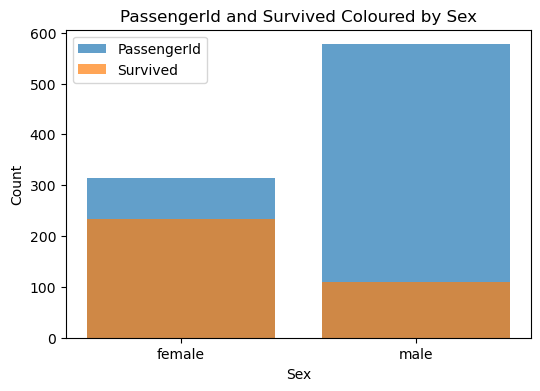

In [136]:
group=df.groupby('Sex').agg({'Survived':'sum','PassengerId':'count'}).reset_index()

plt.figure(figsize=(6,4))
plt.bar(group['Sex'],group['PassengerId'],label='PassengerId',alpha=0.7)
plt.bar(group['Sex'],group['Survived'],label='Survived',alpha=0.7)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend()
plt.title("PassengerId and Survived Coloured by Sex")
plt.show()

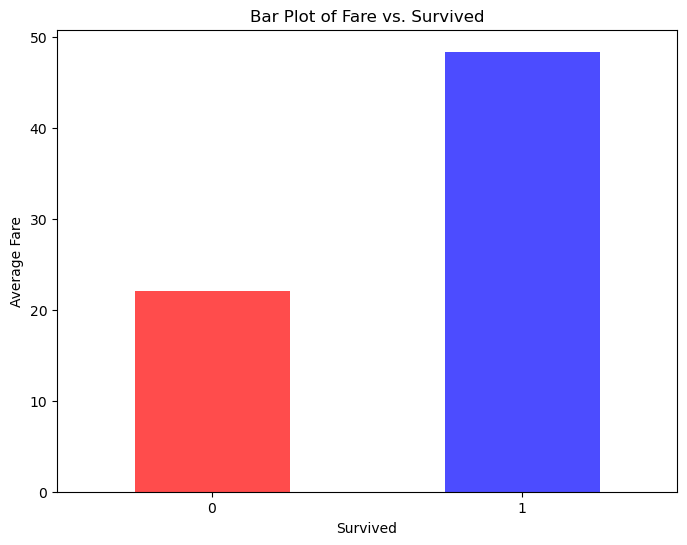

In [137]:
# Group data by 'Survived' and calculate the mean fare for each group
grouped = df.groupby('Survived')['Fare'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['red', 'blue'], alpha=0.7)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.title('Bar Plot of Fare vs. Survived')

# Show the plot
plt.show()

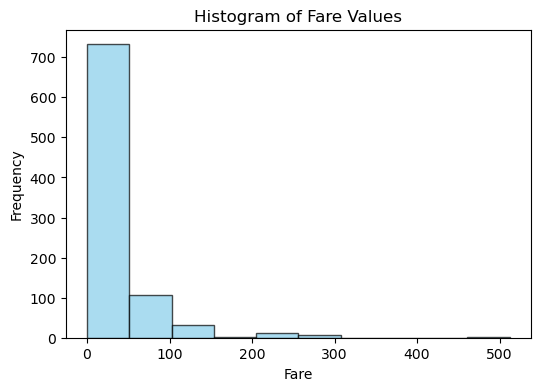

In [138]:
# Create the histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Fare'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare Values')

# Show the histogram
plt.show()

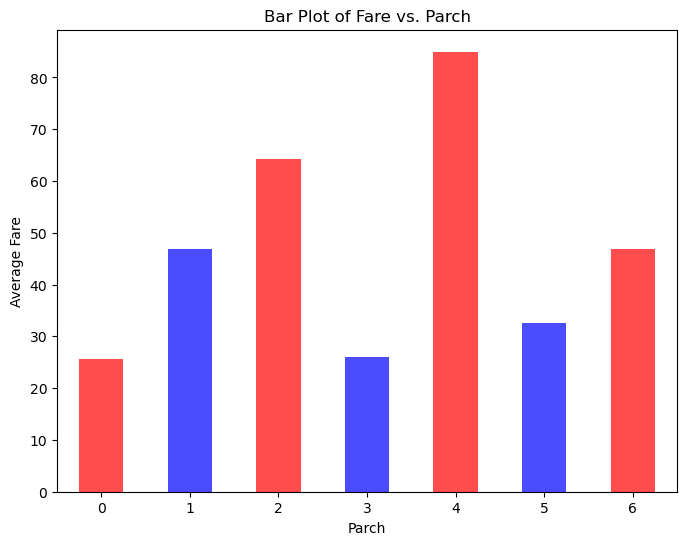

In [139]:
# Group data by 'Survived' and calculate the mean fare for each group
grouped = df.groupby('Parch')['Fare'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['red', 'blue'], alpha=0.7)

# Add labels and title
plt.xlabel('Parch')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.title('Bar Plot of Fare vs. Parch')

# Show the plot
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_13288\2763260199.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Survived', y='Parch', hue='Sex', data=df, ci=None, palette={'male': 'blue', 'female': 'pink'})


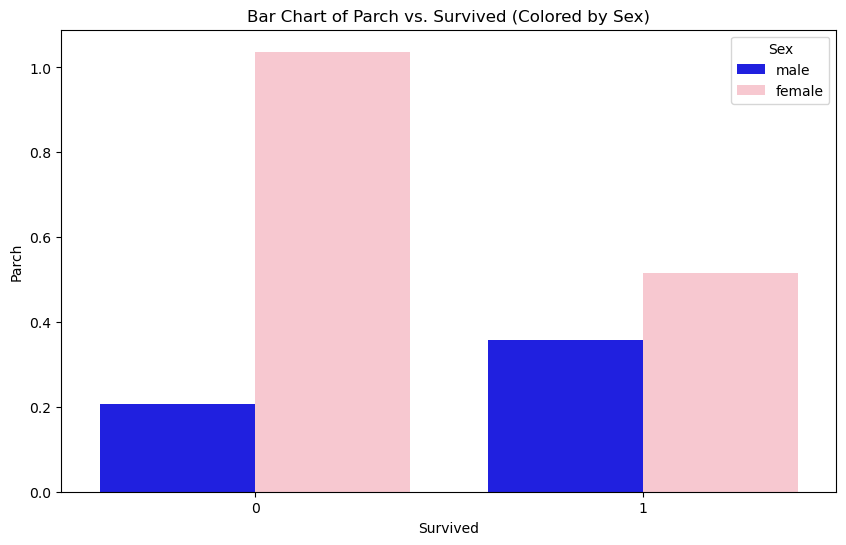

In [140]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Parch', hue='Sex', data=df, ci=None, palette={'male': 'blue', 'female': 'pink'})

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Parch')
plt.title('Bar Chart of Parch vs. Survived (Colored by Sex)')

# Show the chart
plt.show()

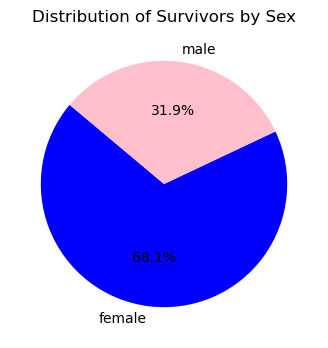

In [141]:
grouped = df.groupby(['Sex', 'Survived']).size().reset_index(name='Counts')

# Filter for only the survivors
survivors = grouped[grouped['Survived'] == 1]

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(survivors['Counts'], labels=survivors['Sex'], autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])

# Add title
plt.title('Distribution of Survivors by Sex')

# Show the pie chart
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_13288\4013157391.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Survived', y='Age', hue='Sex', data=df, ci=None, palette={'male': 'blue', 'female': 'pink'})


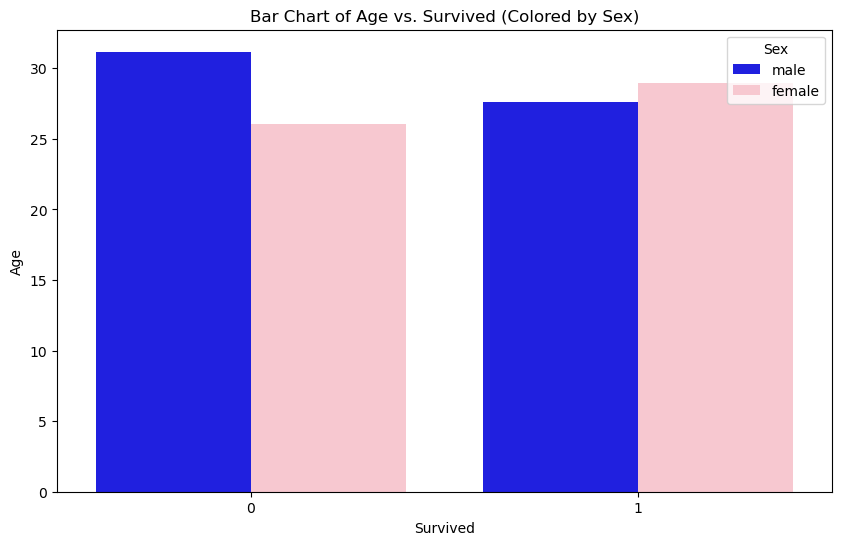

In [142]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Age', hue='Sex', data=df, ci=None, palette={'male': 'blue', 'female': 'pink'})

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Bar Chart of Age vs. Survived (Colored by Sex)')

# Show the chart
plt.show()

In [172]:
y=df['Survived']
X=df[['Pclass','Sex','Age']]

#### Training the model using Linear Regression

In [173]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for linear regression
mse_lr = mean_squared_error(y_test, lr_predictions)

print("Linear Regression Mean Squared Error:", mse_lr)
# Calculate R-squared for linear regression
r2_lr = r2_score(y_test, lr_predictions)
print("Linear Regression R2 score:",r2_lr)

Linear Regression Mean Squared Error: 0.13703957605388628
Linear Regression R2 score: 0.43489252814123935


#### Training the model using Random Forest Classifier

In [174]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for random forest
mse_rf = mean_squared_error(y_test, rf_predictions)

print("Random Forest Mean Squared Error:", mse_rf)
# Calculate R-squared for random forest
r2_rf = r2_score(y_test, rf_predictions)

print("R-squared for Random Forest:", r2_rf)

Random Forest Mean Squared Error: 0.1526579350219776
R-squared for Random Forest: 0.3704874007671577


#### Training the model using Logistic Regression

In [175]:
# Create and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions using the logistic regression model
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy for logistic regression
accuracy = accuracy_score(y_test, logistic_predictions)

print("Accuracy for Logistic Regression:", accuracy)

Accuracy for Logistic Regression: 0.8100558659217877


#### Logistic Regression gives better result as it is beneficial for binary classification

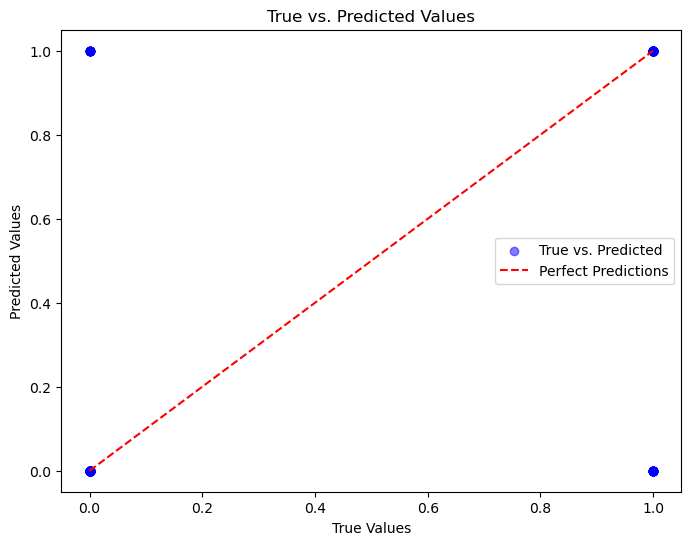

In [178]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, logistic_predictions, c='blue', alpha=0.5, label='True vs. Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')

# Add a legend
plt.legend()

# Show the plot
plt.show()